In [18]:
import sys
import os

current_path = os.getcwd()  # 获取当前工作目录
print("当前路径:", current_path)
current_path = current_path.replace('/samples', '')
print(sys.path)  # 显示所有模块搜索路径
sys.path.append(current_path)  # 添加自定义路径
print(sys.path)  # 显示所有模块搜索路径

当前路径: /Users/yang/PycharmProjects/Option/samples
['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/yang/PycharmProjects/Option']
['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/y

# QuantLib 期权定价示例
# Heston

In [19]:
import QuantLib as ql
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from src.utils import plot_fig
from src.QlCalendar import QlCalendar
from src.QlStocks import QlStocks
from src.QlEuropeanOptions import QlEuropeanOptions

## 1. 初始化设置
#### 创建日历、股票和期权对象

In [20]:
# 设置初始日期
start_date = ql.Date(2, 6, 2025)  # 2025年6月2日
ql_calendar = QlCalendar(init_date=start_date)

S0 = 100.0  # Initial stock price
V0 = 0.04  # Initial volatility
kappa = 2.0  # Mean reversion speed of volatility
theta = 0.04  # Long-term mean of volatility
sigma = 0.3  # Volatility of volatility
rho = -0.7  # Correlation between price and volatility
r = 0.05  # Risk-free rate
K = 100.0  # Option strike price

# 创建股票对象
ql_stocks = QlStocks(ql_calendar)
# 添加一直基于bs模型的股票，命名为STOCK001
ql_stocks.add_heston(codes="GOOG",
                     stock_prices=S0,
                     v0=V0,
                     kappa=kappa,
                     theta=theta,
                     rho=rho,
                     sigma=sigma,
                     dividend_rates=0.0,
                     )
             
s_1 = ql_stocks.stock('GOOG')

# 创建20条，20日路径
paths = s_1.stock_paths(20, 50, random_seed=1)
# 取其中一条
paths = paths[16,np.newaxis]
# 导入路径
ql_stocks.set_all_prices(paths)
ql_stocks.stock_prices

使用步数: 50 步
timesteps: 50, Time length(per year): 0.19452054794520549start_date: June 2nd, 2025 end_date: August 12th, 2025


,"June 2nd, 2025","June 3rd, 2025","June 4th, 2025","June 5th, 2025","June 6th, 2025","June 9th, 2025","June 10th, 2025","June 11th, 2025","June 12th, 2025","June 13th, 2025",...,"July 30th, 2025","July 31st, 2025","August 1st, 2025","August 4th, 2025","August 5th, 2025","August 6th, 2025","August 7th, 2025","August 8th, 2025","August 11th, 2025","August 12th, 2025"
GOOG,100.0,101.593377,101.348079,102.482082,101.882682,101.792742,100.714366,98.871635,98.357363,99.042621,...,107.902841,108.045813,108.755002,109.086503,107.6257,108.190831,109.778338,109.919499,110.593925,110.865114


<Axes: >

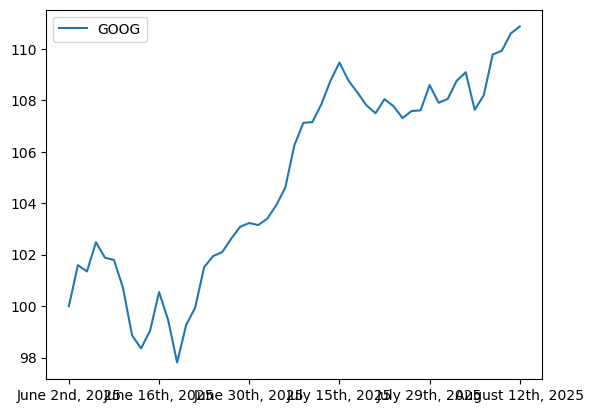

In [58]:
ql_stocks.stock_prices.T.plot()

## 2. 创建期权

In [22]:
# 创建期权class
options = QlEuropeanOptions(s_1)  # 实例化期权

In [23]:
# 创建多个欧式看涨和看跌期权
options.add_options(
    'call',
    [85, 90, 95, 100, 105, 110, 115],  # 行权价
    ql.Date(30, 6, 2025),  # 到期日
)
options.add_options(
    'put',
    [85, 90, 95, 100, 105, 110, 115],  # 行权价
    ql.Date(30, 6, 2025),  # 到期日
)
options.options_df

,,,,payoff,exercise,options
codes,types,strike,maturity,,,
GOOG250630C00085000,call,85,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00090000,call,90,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00095000,call,95,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00100000,call,100,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00105000,call,105,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00110000,call,110,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00115000,call,115,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630P00085000,put,85,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630P00090000,put,90,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...


## 3. 测试不同定价引擎
### 3.1 AnalyticEuropeanEngine (解析解)

In [24]:
# 全部设为解析解
options.analytic_engines()

In [25]:
# 计算并显示结果
npv = options.NPV()
print(f"AnalyticEuropeanEngine 结果是list: {npv}")

print(f"dataframe 更方便查看：")
pd.DataFrame(
    {ql_calendar.today(): npv},
    index = options.options_df.index
)


AnalyticEuropeanEngine 结果是list: [1.53362106e+01 1.04382889e+01 5.89755522e+00 2.39572447e+00
 5.63674423e-01 5.87333593e-02 2.18164881e-03 1.08077095e-02
 9.37446142e-02 5.33869583e-01 2.01289749e+00 5.16170609e+00
 9.63762368e+00 1.45619306e+01]
dataframe 更方便查看：


,,,,"June 2nd, 2025"
codes,types,strike,maturity,
GOOG250630C00085000,call,85,"June 30th, 2025",15.336211
GOOG250630C00090000,call,90,"June 30th, 2025",10.438289
GOOG250630C00095000,call,95,"June 30th, 2025",5.897555
GOOG250630C00100000,call,100,"June 30th, 2025",2.395724
GOOG250630C00105000,call,105,"June 30th, 2025",0.563674
GOOG250630C00110000,call,110,"June 30th, 2025",0.058733
GOOG250630C00115000,call,115,"June 30th, 2025",0.002182
GOOG250630P00085000,put,85,"June 30th, 2025",0.010808
GOOG250630P00090000,put,90,"June 30th, 2025",0.093745


### 3.2 FdBlackScholesVanillaEngine (有限差分法) - 速度慢

In [26]:
# 将期权更改为fd引擎
tGrid, xGrid = 2000, 200
# 如果不传入codes，则更改所有的现有期权
options.fd_engines(
    tGrid=tGrid,
    xGrid=xGrid
)

In [27]:
# 计算并显示结果
npv = options.NPV()
print(f"\nFdBlackScholesVanillaEngine 结果是list: {npv}")

print(f"dataframe 更方便查看：")
pd.DataFrame(
    {ql_calendar.today(): npv},
    index = options.options_df.index
)


FdBlackScholesVanillaEngine 结果是list: [1.53385324e+01 1.04398831e+01 5.89845228e+00 2.39598274e+00
 5.63746525e-01 5.90341153e-02 2.16596919e-03 1.08438586e-02
 9.38011155e-02 5.33961158e-01 2.01304893e+00 5.16232541e+00
 9.63907395e+00 1.45636101e+01]
dataframe 更方便查看：


,,,,"June 2nd, 2025"
codes,types,strike,maturity,
GOOG250630C00085000,call,85,"June 30th, 2025",15.338532
GOOG250630C00090000,call,90,"June 30th, 2025",10.439883
GOOG250630C00095000,call,95,"June 30th, 2025",5.898452
GOOG250630C00100000,call,100,"June 30th, 2025",2.395983
GOOG250630C00105000,call,105,"June 30th, 2025",0.563747
GOOG250630C00110000,call,110,"June 30th, 2025",0.059034
GOOG250630C00115000,call,115,"June 30th, 2025",0.002166
GOOG250630P00085000,put,85,"June 30th, 2025",0.010844
GOOG250630P00090000,put,90,"June 30th, 2025",0.093801


### 3.3 MCEuropeanEngine (蒙特卡洛模拟)
#### 待开发

In [28]:
# # 创建多个欧式看涨期权
# strikes = np.linspace(90, 110, 5)  # 5个不同行权价
# maturities = [ql.Date(30, 6, 2025)] * len(strikes)  # 相同到期日
# types = ['call'] * len(strikes)  # 全部为看涨期权
# 
# op = options.options_ql_AnalyticEngines(
#     types,
#     strikes,
#     maturities,
#     qlEngine=ql.MCEuropeanEngine,
#     traits = "pseudorandom", # could use "lowdiscrepancy"
#     timeSteps=20,  # 时间步数
#     requiredSamples=1000,  # 路径数量
#     seed=42  # 随机种子
# )
# 
# # 计算并显示结果
# df = options.NPV(op)
# print("\nMCEuropeanEngine 结果:")
# df[['NPV']]


## 4.分析期权随时间的变化

### Heston model Quantlib 不提供默认的delta计算


In [29]:
# options 切换为解析解 因为计算速度快
options.analytic_engines()

In [30]:
try:
    options.delta()
except:
    print('Heston model Quantlib 不提供默认的delta计算')

Heston model Quantlib 不提供默认的delta计算


# 提供了 delta_numerical 计算方式

In [31]:
options.delta_numerical()

array([ 0.9957489 ,  0.96804878,  0.8500212 ,  0.56634664,  0.21968004,
        0.03618086,  0.00194389, -0.0042511 , -0.03195122, -0.1499788 ,
       -0.43365336, -0.78031996, -0.96381914, -0.99805611])

In [32]:
ql_calendar.set_today(start_date)
npv_df = pd.DataFrame(index = options.all_options().index)
delta_df = pd.DataFrame(index = options.all_options().index)
for i in range(20):
    # 获取今日npv
    npv_df[ql_calendar.today()] = options.NPV()
    # 获取今日delta
    delta_df[ql_calendar.today()] = options.delta_numerical()
    # 下一天
    ql_calendar.to_next_trading_date()

In [33]:
# 每天的npv
npv_df

,,,,"June 2nd, 2025","June 3rd, 2025","June 4th, 2025","June 5th, 2025","June 6th, 2025","June 9th, 2025","June 10th, 2025","June 11th, 2025","June 12th, 2025","June 13th, 2025","June 16th, 2025","June 17th, 2025","June 18th, 2025","June 19th, 2025","June 20th, 2025","June 23rd, 2025","June 24th, 2025","June 25th, 2025","June 26th, 2025","June 27th, 2025"
codes,types,strike,maturity,,,,,,,,,,,,,,,,,,,,
GOOG250630C00085000,call,85,"June 30th, 2025",15.336211,16.912002,16.654720,17.774889,17.163988,17.038031,15.948395,14.095556,13.569682,14.241809,15.709145,14.622190,1.295181e+01,1.438880e+01,1.505819e+01,1.659523e+01,1.701698e+01,1.715654e+01,1.766974e+01,1.812098e+01
GOOG250630C00090000,call,90,"June 30th, 2025",10.438289,11.974142,11.715431,12.816888,12.207993,12.070733,10.987216,9.157873,8.635976,9.286683,10.726011,9.641527,7.982213e+00,9.402364e+00,1.006733e+01,1.160007e+01,1.202110e+01,1.215996e+01,1.267248e+01,1.312303e+01
GOOG250630C00095000,call,95,"June 30th, 2025",5.897555,7.262715,7.009405,8.017669,7.433129,7.258766,6.237388,4.592117,4.124454,4.650546,5.877964,4.857970,3.387319e+00,4.587317e+00,5.176873e+00,6.617498e+00,7.029762e+00,7.164992e+00,7.675427e+00,8.125094e+00
GOOG250630C00100000,call,100,"June 30th, 2025",2.395724,3.338023,3.127314,3.867404,3.392262,3.179388,2.419598,1.377066,1.105711,1.349570,1.970129,1.318887,6.032613e-01,1.089780e+00,1.356577e+00,2.115410e+00,2.367700e+00,2.413647e+00,2.795230e+00,3.167994e+00
GOOG250630C00105000,call,105,"June 30th, 2025",0.563674,0.957959,0.845199,1.185184,0.934106,0.783942,0.472046,0.167252,0.107595,0.145925,0.248457,0.106371,2.107959e-02,5.953216e-02,8.230471e-02,1.408241e-01,1.536143e-01,1.272990e-01,1.442209e-01,1.484138e-01
GOOG250630C00110000,call,110,"June 30th, 2025",0.058733,0.132725,0.105219,0.176756,0.115834,0.076837,0.031240,0.005257,0.002350,0.003528,0.006359,0.001266,6.681488e-05,3.168399e-04,4.466088e-04,4.807065e-04,3.622535e-04,1.310434e-04,7.227490e-05,2.022417e-05
GOOG250630C00115000,call,115,"June 30th, 2025",0.002182,0.006893,0.004642,0.009672,0.004822,0.002123,0.000498,0.000032,0.000009,0.000014,0.000020,0.000001,1.385965e-08,9.499811e-08,1.097949e-07,2.605539e-08,7.468534e-09,4.578458e-10,3.543864e-11,3.227054e-13
GOOG250630P00085000,put,85,"June 30th, 2025",0.010808,0.004822,0.004440,0.002209,0.002312,0.001119,0.001471,0.002976,0.002988,0.001473,0.000150,0.000190,3.914883e-04,6.024964e-05,1.349488e-05,2.597899e-08,1.000403e-09,1.912891e-11,2.130461e-14,0.000000e+00
GOOG250630P00090000,put,90,"June 30th, 2025",0.093745,0.048503,0.047374,0.027115,0.029906,0.019459,0.026612,0.052296,0.056969,0.034717,0.007436,0.010631,2.258644e-02,6.091118e-03,2.308384e-03,4.650021e-05,6.408852e-06,6.623061e-07,1.120410e-08,1.672996e-11


In [34]:
call_npv = npv_df[npv_df.index.get_level_values('types') == 'call']
labels = zip(call_npv.index.get_level_values('types'), call_npv.index.get_level_values('strike'))
call_labels = [f"{t} - {s}" for t, s in labels]
plt_call_npv = call_npv.T
plt_call_npv.columns = call_labels

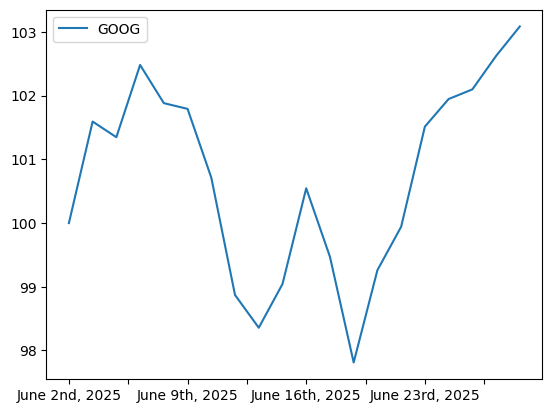

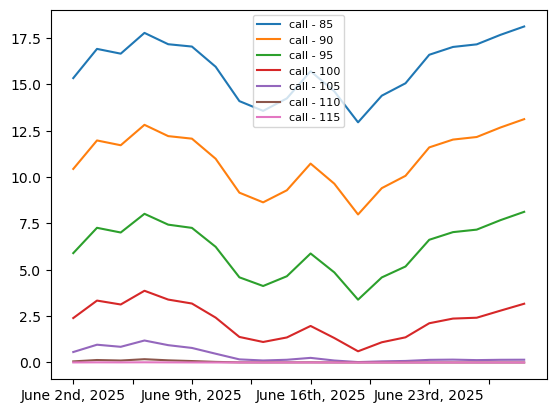

In [35]:
ql_stocks.stock_prices.T.iloc[:20].plot()
#
plt_call_npv.plot()
plt.legend(fontsize=8)
plt.show()

In [36]:
put_npv = npv_df[npv_df.index.get_level_values('types') == 'put']
labels = zip(put_npv.index.get_level_values('types'), put_npv.index.get_level_values('strike'))
put_labels = [f"{t} - {s}" for t, s in labels]
plt_put_npv = put_npv.T
plt_put_npv.columns = put_labels

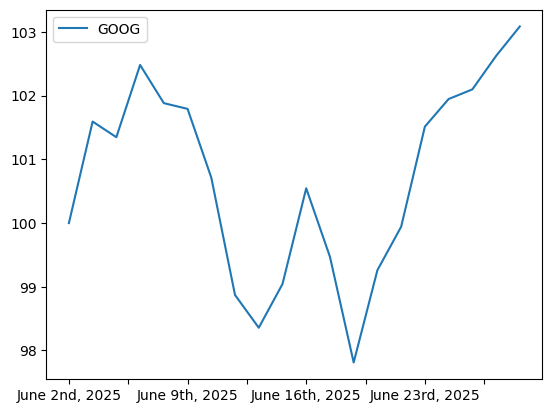

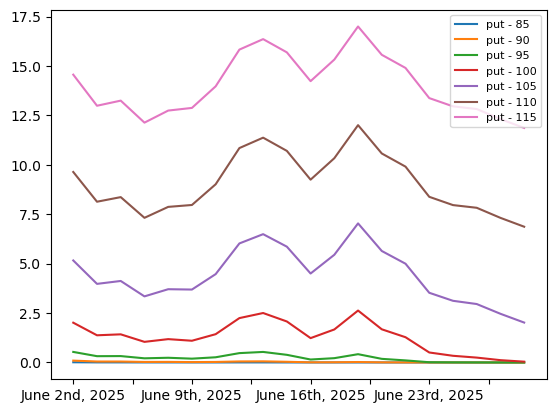

In [37]:
ql_stocks.stock_prices.T.iloc[:20].plot()
#
plt_put_npv.plot()
plt.legend(fontsize=8)
plt.show()

In [38]:
# 每天的delta
delta_df

,,,,"June 2nd, 2025","June 3rd, 2025","June 4th, 2025","June 5th, 2025","June 6th, 2025","June 9th, 2025","June 10th, 2025","June 11th, 2025","June 12th, 2025","June 13th, 2025","June 16th, 2025","June 17th, 2025","June 18th, 2025","June 19th, 2025","June 20th, 2025","June 23rd, 2025","June 24th, 2025","June 25th, 2025","June 26th, 2025","June 27th, 2025"
codes,types,strike,maturity,,,,,,,,,,,,,,,,,,,,
GOOG250630C00085000,call,85,"June 30th, 2025",0.995749,0.998011,0.998113,0.999018,0.998941,0.999425,0.999220,0.998394,0.998324,0.999121,0.999891,0.999855,9.996898e-01,9.999468e-01,9.999868e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
GOOG250630C00090000,call,90,"June 30th, 2025",0.968049,0.982478,0.982431,0.989414,0.988048,0.991331,0.987931,0.976399,0.973561,0.982777,0.995475,0.993328,9.857283e-01,9.956279e-01,9.981588e-01,9.999464e-01,9.999914e-01,9.999989e-01,1.000000e+00,1.000000e+00
GOOG250630C00095000,call,95,"June 30th, 2025",0.850021,0.903564,0.900077,0.930774,0.920603,0.929242,0.903840,0.834247,0.811439,0.852582,0.929275,0.897162,8.120424e-01,9.035663e-01,9.381817e-01,9.890964e-01,9.954152e-01,9.980951e-01,9.996920e-01,9.999828e-01
GOOG250630C00100000,call,100,"June 30th, 2025",0.566347,0.673213,0.658230,0.729748,0.694980,0.693994,0.615021,0.454628,0.402724,0.462304,0.601449,0.489337,3.022649e-01,4.561884e-01,5.331773e-01,7.312225e-01,7.915781e-01,8.251845e-01,8.962660e-01,9.523724e-01
GOOG250630C00105000,call,105,"June 30th, 2025",0.219680,0.319518,0.296755,0.374317,0.324052,0.298581,0.211994,0.098058,0.070085,0.090945,0.145849,0.076564,2.032971e-02,5.018097e-02,6.750513e-02,1.167359e-01,1.315754e-01,1.206695e-01,1.437454e-01,1.624770e-01
GOOG250630C00110000,call,110,"June 30th, 2025",0.036181,0.071217,0.059677,0.091352,0.065966,0.049048,0.023423,0.005036,0.002491,0.003652,0.006547,0.001577,1.077691e-04,4.692414e-04,6.633174e-04,7.973387e-04,6.476308e-04,2.695631e-04,1.675462e-04,5.638546e-05
GOOG250630C00115000,call,115,"June 30th, 2025",0.001944,0.005529,0.003932,0.007639,0.004171,0.002081,0.000562,0.000045,0.000013,0.000021,0.000032,0.000003,3.195941e-08,2.112524e-07,2.513987e-07,7.163649e-08,2.269127e-08,1.627282e-09,1.470370e-10,1.664669e-12
GOOG250630P00085000,put,85,"June 30th, 2025",-0.004251,-0.001989,-0.001887,-0.000982,-0.001059,-0.000575,-0.000780,-0.001606,-0.001676,-0.000879,-0.000109,-0.000145,-3.102286e-04,-5.320245e-05,-1.316786e-05,-3.633942e-08,-1.631486e-09,-3.781049e-11,0.000000e+00,0.000000e+00
GOOG250630P00090000,put,90,"June 30th, 2025",-0.031951,-0.017522,-0.017569,-0.010586,-0.011952,-0.008669,-0.012069,-0.023601,-0.026439,-0.017223,-0.004525,-0.006672,-1.427170e-02,-4.372103e-03,-1.841216e-03,-5.363048e-05,-8.628968e-06,-1.061140e-06,-2.251107e-08,-4.554483e-11


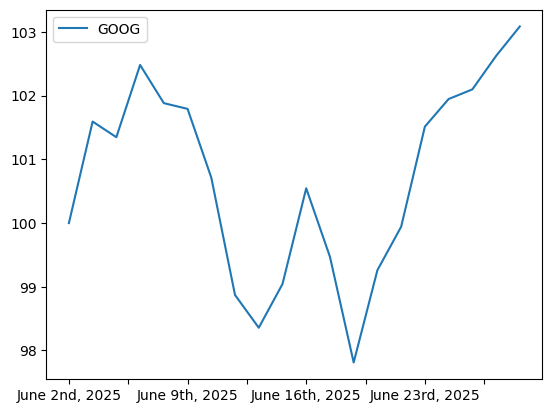

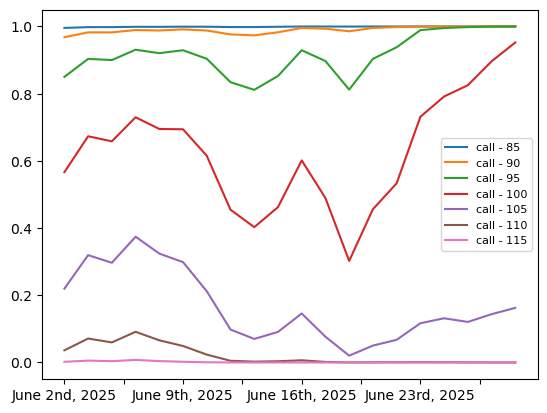

In [39]:
plt_delta = delta_df[delta_df.index.get_level_values('types') == 'call'].T
plt_delta.columns = call_labels
#
ql_stocks.stock_prices.T.iloc[:20].plot()
#
plt_delta.plot()
plt.legend(fontsize=8)
plt.show()

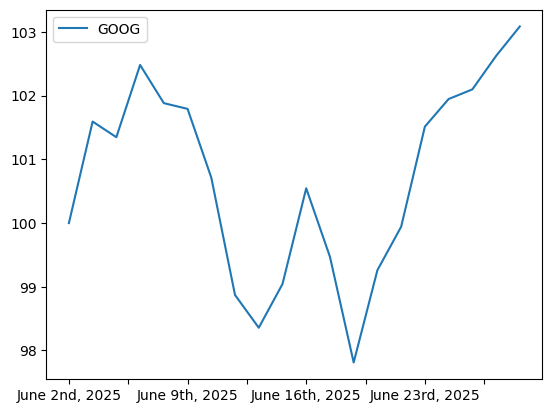

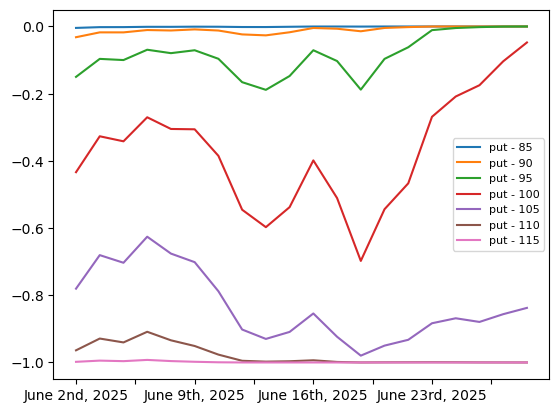

In [40]:
plt_delta = delta_df[delta_df.index.get_level_values('types') == 'put'].T
plt_delta.columns = put_labels
#
ql_stocks.stock_prices.T.iloc[:20].plot()
#
plt_delta.plot()
plt.legend(fontsize=8)
plt.show()

## 5.分析单独一个期权


In [41]:
# 回滚日期
ql_calendar.set_today(start_date)
# 显示已有的期权
options.options_df

,,,,payoff,exercise,options
codes,types,strike,maturity,,,
GOOG250630C00085000,call,85,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00090000,call,90,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00095000,call,95,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00100000,call,100,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00105000,call,105,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00110000,call,110,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630C00115000,call,115,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630P00085000,put,85,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...
GOOG250630P00090000,put,90,"June 30th, 2025",<QuantLib.QuantLib.PlainVanillaPayoff; proxy o...,<QuantLib.QuantLib.EuropeanExercise; proxy of ...,<QuantLib.QuantLib.EuropeanOption; proxy of <S...


### 研究第一个期权, 需要期权的code

In [42]:
# 研究第一个期权，获取code：
code = options.options_df.index[0][0]
code

'GOOG250630C00085000'

In [43]:
call = options.option(code)

In [44]:
call.NPV()

15.336210647351347

In [45]:
print(ql_calendar.today())
# 当价格是110时
s_1.set_today_price(110)
call.NPV()

June 2nd, 2025


25.32558406771925

In [46]:
print(ql_calendar.today())
# 当价格是90时
s_1.set_today_price(90)
call.NPV()

June 2nd, 2025


5.729680198433506

In [47]:
# 下一个交易日
ql_calendar.to_next_trading_date()
print(ql_calendar.today())
s_1.set_today_price(90)
call.NPV()

June 3rd, 2025


5.698519167747947

## 运算 100000 次 期权价格

In [48]:
call.analytic_engine()

In [49]:
paths = s_1.stock_paths(paths=100000, date_param=1)[:, -1]

使用步数: 1 步
timesteps: 1, Time length(per year): 0.0027397260273972603start_date: June 3rd, 2025 end_date: June 4th, 2025


In [50]:
paths.shape

(100000,)

In [51]:
npvs = call.NPV_multi(paths)
npvs.shape

(100000,)

In [52]:
delta = call.delta_numerical_multi(paths)
delta.shape

(100000,)

In [53]:
print(f'日期：{ql_calendar.today()}, 期权代码: {code}')
print('不同股票价格对应的期权价格和delta')
df = pd.DataFrame({
    'stock_prices': paths,
    'npvs': npvs,
    'delta': delta
})
df

日期：June 3rd, 2025, 期权代码: GOOG250630C00085000
不同股票价格对应的期权价格和delta


,stock_prices,npvs,delta
0,90.911518,6.509227,0.903923
1,89.114354,4.940241,0.837406
2,90.016160,5.712644,0.874338
3,90.035949,5.729953,0.875065
4,90.976620,6.568136,0.905824
...,...,...,...
99995,90.424976,6.073065,0.888667
99996,90.363571,6.018560,0.886606
99997,88.204693,4.198463,0.792077
99998,89.803295,5.527376,0.866300


In [54]:
n = 5000
stock_prices = df['stock_prices'].values[:n]
npvs = df['npvs'].values[:n]
delta = df['delta'].values[:n]

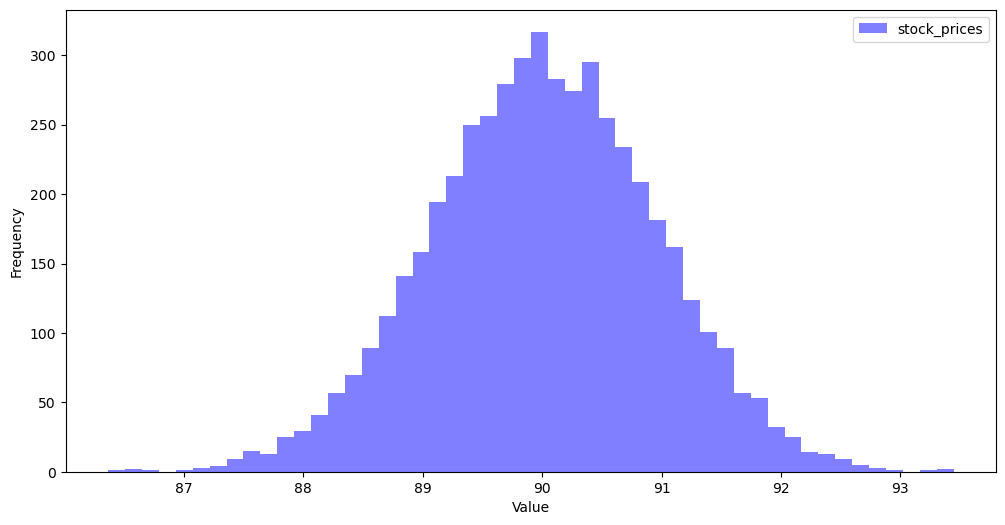

In [55]:
# 创建直方图对比
plt.figure(figsize=(12, 6))

plt.hist(stock_prices, bins=50, alpha=0.5, label='stock_prices', color='blue')

# 添加图表元素
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

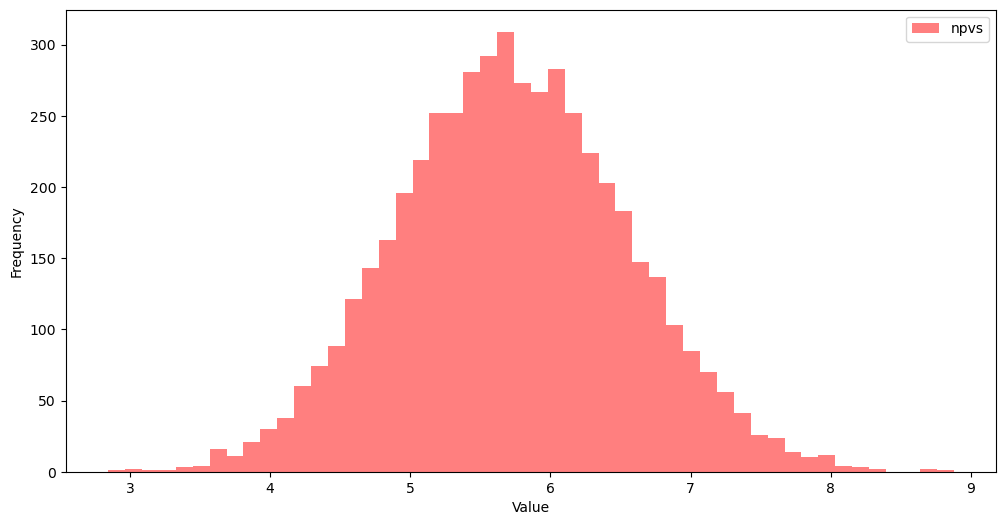

In [56]:
# 创建直方图对比
plt.figure(figsize=(12, 6))

# 绘制第二个数组的直方图
plt.hist(npvs, bins=50, alpha=0.5, label='npvs', color='red')

# 添加图表元素
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

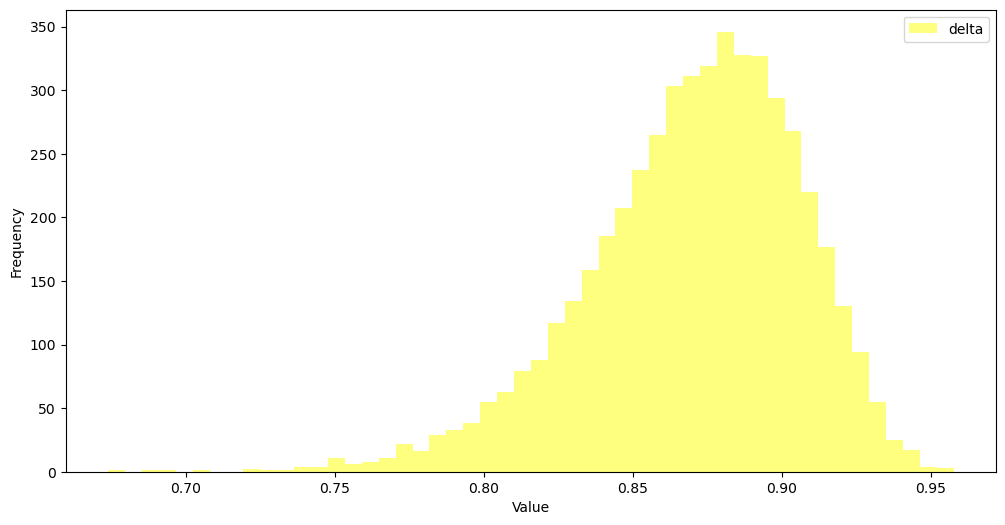

In [57]:
# 创建直方图对比
plt.figure(figsize=(12, 6))

plt.hist(delta, bins=50, alpha=0.5, label='delta', color='yellow')

# 添加图表元素
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.show()